# Introduction

### Dataset Origin
The dataset contains real-world information from Brazilian e-commerce transactions. It was originally made publicly available by *Olist*, a Brazilian online retail platform, for educational and analytical purposes. The data is anonymized and reflects actual customer orders, payments, products, and reviews.

### Objective
The main goal of this project is to build an interpretable model to support the Business Intelligence team by explaining the key factors behind positive or negative customer reviews.  
This model is designed for **explainability**, not for **predictive accuracy**. Its purpose is to clearly identify which variables have the greatest influence on customer satisfaction, helping prioritize service improvements. The business goal is not to predict but to address and resolve negative customer experiences.
The project is intended to be used and reviewed within a Jupyter Notebook environment.


### EDA 
**This section can be skiped**. No necessary code to execute model is on this secction. If dessired jump to Conclussions. This secction is a small sample to ejemplify the code used to explore de data.

In [4]:
### Data upload
import pandas as pd

data_path = "../Data/"

df_customers = pd.read_csv(data_path + "olist_customers_dataset.csv")
df_geolocation = pd.read_csv(data_path + "olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(data_path + "olist_order_items_dataset.csv")
df_payments = pd.read_csv(data_path + "olist_order_payments_dataset.csv")
df_reviews = pd.read_csv(data_path + "olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(data_path + "olist_orders_dataset.csv")
df_products = pd.read_csv(data_path + "olist_products_dataset.csv")
df_sellers = pd.read_csv(data_path + "olist_sellers_dataset.csv")
df_category = pd.read_csv(data_path + "product_category_name_translation.csv")

df_closed = pd.read_csv(data_path + "olist_closed_deals_dataset.csv")
df_leads = pd.read_csv(data_path + "olist_marketing_qualified_leads_dataset.csv")


Full data has 3 kind of columns, dates, numeric and text.
<!--  -->
Next is a sample of resources used for all data and evaluation process for each column kind. This was repeated for all columns.

In [206]:
### Easy access object
df_M = [ "df_customers", "df_geolocation", "df_order_items", "df_payments", "df_reviews", "df_products", "df_sellers", "df_closed", "df_leads"]

In [208]:
### Identify columns
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [6]:
### Small sample of table 
df_sellers[:10]

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


*Text columns were explored as follows*

In [79]:
### Fast review of data 
df_customers["customer_state"][:10]

0    SP
1    SP
2    SP
3    SP
4    SP
5    SC
6    SP
7    MG
8    PR
9    MG
Name: customer_state, dtype: object

In [12]:
### Frequency summary for categories
df_customers["customer_state"].describe()

count     99441
unique       27
top          SP
freq      41746
Name: customer_state, dtype: object

In [ ]:
### Identification of unique values
df_customers["customer_state"].value_counts()

In [ ]:
### Nulls count per column
df_customers["customer_state"].isnull().sum()

In [10]:
### Identification of data type
df_customers["customer_state"].dtype

dtype('O')

In [ ]:
### Identification of unexpected lenghts 
df_customers[df_customers["customer_id"].str.len()!=32]

In [ ]:
### Values supposed to be unique are unique 
(df_closed["mql_id"].value_counts() > 1).sum()

In [ ]:
### For exploration of columns with big amount of cateogires 
for val in sorted(df_geolocation["geolocation_city"].unique()):
    print(val)

*Numeric columns were explored as follows*

In [ ]:
### Fast review of data 
df_products["product_height_cm"][:10]

In [ ]:
### Identification of data type
df_products["product_height_cm"].dtype

In [14]:
### Data distribution
df_products["product_height_cm"].describe()

count    32949.000000
mean        16.937661
std         13.637554
min          2.000000
25%          8.000000
50%         13.000000
75%         21.000000
max        105.000000
Name: product_height_cm, dtype: float64

In [ ]:
### Nulls count per column
df_order_items["product_height_cm"].isnull().sum()

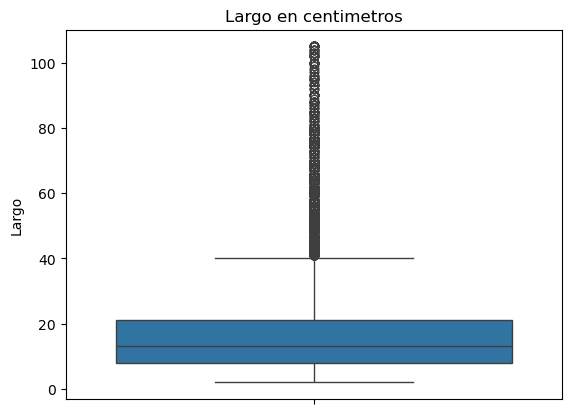

In [210]:
### Fast visualization of data distribution 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.boxplot (y = df_products["product_height_cm"] )
plt.ylabel("Largo")
plt.title("Largo en centimetros")
plt.show()

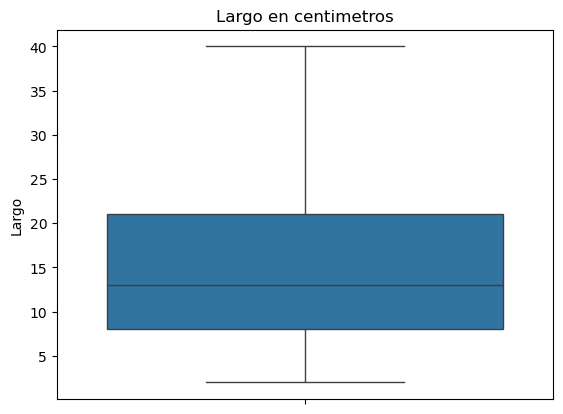

In [212]:
### Fast visualization of data distribution (showfliers = False)
import matplotlib.pyplot as plt
import seaborn as sns 

sns.boxplot (y = df_products["product_height_cm"], showfliers = False )
plt.ylabel("Largo")
plt.title("Largo en centimetros")
plt.show()

*Date columns were explored as follows*

In [ ]:
### Fast review of data 
df_orders["order_purchase_timestamp"][:10]

In [ ]:
### Identification of data type
df_orders["order_purchase_timestamp"].dtype

In [ ]:
### Nulls count per column
df_orders["order_purchase_timestamp"].isnull().sum()

## **EDA Conclusions**

### This was detected in data as relevant prior use as input for model and the selected correction.

- Nulls distribution.
- `df_geolocation["geolocation_city"]` has duplicated categories due to small variations in writing (Not in model).
- Date columns has wrong data type.
- `df_products["product_category_name"]` has duplicated categories due to small variations in writing.
- `df_products["product_category_name"]` has "alimentos", "alimentos_bebidas", "bebidas". Unclear overlap.    
- `df_sellers["seller_city"]` has values that are likely an error (Not in model).

### This are the conslusions for the data.

- The nulls amount is relatively small, may be ereased  for esae cleniang without compromising analisis.
- `df_geolocation["geolocation_city"]` is not required in models son no cleaning process is taken.
- `df_products["product_category_name"]` has high granularity. Subcategories are not treated as issues.

## **Data Preprocesing**

The following steps preprocess the data to generate two distinct inputs, one for linear models and another for tree based models.

In [1]:
### Data preprocesing to add more FE

##1 Data upload
import pandas as pd

data_path = "../Data/"

df_customers = pd.read_csv(data_path + "olist_customers_dataset.csv")
df_geolocation = pd.read_csv(data_path + "olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(data_path + "olist_order_items_dataset.csv")
df_payments = pd.read_csv(data_path + "olist_order_payments_dataset.csv")
df_reviews = pd.read_csv(data_path + "olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(data_path + "olist_orders_dataset.csv")
df_products = pd.read_csv(data_path + "olist_products_dataset.csv")
df_sellers = pd.read_csv(data_path + "olist_sellers_dataset.csv")
df_category = pd.read_csv(data_path + "product_category_name_translation.csv")

df_closed = pd.read_csv(data_path + "olist_closed_deals_dataset.csv")
df_leads = pd.read_csv(data_path + "olist_marketing_qualified_leads_dataset.csv")

#2 Table for reference
df_Ma =  ["df_order_items", "df_payments", "df_products", "df_customers", "df_orders", "df_reviews"]

#3 Data type correction in date columns
import pandas as pd

for x in df_Ma:
    df = globals()[x]
    for z in df.columns:
        if z == "order_purchase_timestamp" or z == "order_delivered_customer_date" or z == "order_estimated_delivery_date":
            df[z] = pd.to_datetime(df[z])

#4 Preprocesing for df merge
a = df_order_items[[ "price", "freight_value", "order_id", "product_id" ]]
b = df_payments[[ "payment_type", "payment_installments", "order_id" ]]
c = df_products[[ "product_category_name", "product_weight_g", "product_id" ]]
d = df_customers[["customer_state", "customer_id"]]
e = df_orders[["order_purchase_timestamp", "order_delivered_customer_date", "customer_id", "order_id", "order_estimated_delivery_date"]]
f = df_reviews[["review_score", "order_id"]]

#5 df merge
import pandas as pd

TablaM = pd.merge( a, b, how = "inner", on = "order_id" )
TablaM = pd.merge( TablaM, e, how = "inner", on = "order_id" )
TablaM = pd.merge( TablaM, f, how = "inner", on = "order_id" )
TablaM = pd.merge( TablaM, c, how = "inner", on = "product_id" )
TablaM = pd.merge( TablaM, d, how = "inner", on = "customer_id" )

#6 Nulls erasing
TablaM = TablaM.dropna()

#7 Convert review_score into binary target. 1 for scores < 4, 0 otherwise
TablaM.loc[TablaM["review_score"]<4, "review_score"] = 1
TablaM.loc[TablaM["review_score"]>=4, "review_score"] = 0

#8 y creation
y = TablaM["review_score"]

#9 x creation
x = TablaM.drop("review_score", axis = 1)

#10 Duplicated categories converted 
x.loc[ x["product_category_name"] == "casa_conforto_2" , "product_category_name"] = "casa_conforto"
x.loc[ x["product_category_name"] == "eletrodomesticos_2" , "product_category_name"] = "eletrodomesticos"

#11 Categorical columns converted to dummies
import pandas as pd
cols = ["payment_type", "product_category_name", "customer_state"]
x = pd.get_dummies(x, columns = cols )

#12 x["Days_TA"] column creation
x["Days_TA"] = (x["order_delivered_customer_date"] - x["order_purchase_timestamp"]).dt.days

#13 x["Days_Early"] column creation
x["Days_Early"] = ( x["order_estimated_delivery_date"] -x["order_delivered_customer_date"]  ).dt.days

#14 Redundant and unnecesary columns ereased
x = x.drop(["order_delivered_customer_date", "order_purchase_timestamp", "order_estimated_delivery_date"], axis = 1)

#15 id columns droped due to being unnecesary for model training
import pandas as pd
x = x.drop (["order_id", "product_id", "customer_id"], axis = 1)

#16 The most frequent categories are droped as they are considered base categories. 
xS = x.copy().drop(["product_category_name_cama_mesa_banho", "customer_state_SP", "payment_type_credit_card"], axis = 1)

#17 train and test varaibles creation (tree based models)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state = 42, stratify = y )

#17B train and test varaibles creation (for linear models) 
from sklearn.model_selection import train_test_split

x_trainS, x_testS, y_trainS, y_testS = train_test_split(xS, y, test_size= .2, random_state = 42, stratify = y )

###18B Scaled data for linnear model 
x_trainS_columns = x_trainS.columns.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ["freight_value", "payment_installments", "product_weight_g", "Days_Early", "Days_TA"]

x_trainS[cols] = scaler.fit_transform(x_trainS[cols])
x_testS[cols] = scaler.transform(x_testS[cols])



## **Model Testing**

In [3]:
### LogisticRegression "balanced"
from sklearn.linear_model import LogisticRegression

LR_B = LogisticRegression(class_weight = "balanced", max_iter=3000, random_state=42)
LR_B.fit(x_trainS, y_trainS)
y_predS = LR_B.predict(x_testS)

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy",accuracy_score(y_testS, y_predS))
print(f1_score(y_testS, y_predS))
print(classification_report(y_testS, y_predS, digits=4))

Accuracy 0.6668874464608999
0.420939514891004
              precision    recall  f1-score   support

           0     0.8313    0.7105    0.7662     17397
           1     0.3525    0.5223    0.4209      5250

    accuracy                         0.6669     22647
   macro avg     0.5919    0.6164    0.5936     22647
weighted avg     0.7203    0.6669    0.6862     22647



In [4]:
### RandomForestClassifier "balanced"
from sklearn.ensemble import RandomForestClassifier

RF_B = RandomForestClassifier(class_weight = "balanced", random_state = 42)
RF_B.fit(x_train, y_train)
y_pred = RF_B.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:",accuracy_score(y_test, y_pred))
print("f1:",f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8492074005387027
f1: 0.5678856130583323
              precision    recall  f1-score   support

           0     0.8497    0.9765    0.9087     17397
           1     0.8458    0.4274    0.5679      5250

    accuracy                         0.8492     22647
   macro avg     0.8477    0.7020    0.7383     22647
weighted avg     0.8488    0.8492    0.8297     22647



In [5]:
### Proba variations testing with restrictions (RF_B)
import numpy as np

from sklearn.metrics import precision_score, recall_score, f1_score

proba = RF_B.predict_proba(x_test)[:, 1]
for z in np.arange(0.4, 0.5, 0.01):
    y_pred_thresh = (proba >= z).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    if (precision >= .7) and (recall>=.45):
        f1 = f1_score(y_test, y_pred_thresh)
        print (f"{z:.4f}: f1:{f1:.4f}, recall:{recall:.4f}, precision:{precision:.4f} ")

0.4000: f1:0.5804, recall:0.4766, precision:0.7420 
0.4100: f1:0.5789, recall:0.4657, precision:0.7648 
0.4200: f1:0.5777, recall:0.4598, precision:0.7767 
0.4300: f1:0.5765, recall:0.4541, precision:0.7891 


**`Threshold = .43` is the optimized value for the `RF_B` model** 

**Class 1** 
- *0.43*| **f1**: *57.65%*, **recall:** *45.41%*, **precision:** *78.91%*

In [7]:
### Basic Tuning for selected model testing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, accuracy_score


RF_B_T = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],        
    'max_depth': [None, 10, 20],       
    'min_samples_split': [2, 5],       
}

grid = GridSearchCV(
    RF_B_T,
    param_grid,
    scoring='f1',  
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

RF_B_T = grid.best_estimator_
y_pred = RF_B_T.predict(x_test)

# Performance Evaluation
print('f1_score:', f1_score(y_test, y_pred, average='binary'))
print('accuracy_score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
f1_score: 0.5718489455615497
accuracy_score: 0.845807391707511
              precision    recall  f1-score   support

           0     0.8522    0.9670    0.9060     17397
           1     0.8025    0.4442    0.5718      5250

    accuracy                         0.8458     22647
   macro avg     0.8273    0.7056    0.7389     22647
weighted avg     0.8407    0.8458    0.8285     22647



In [8]:
### Proba variations testing with restrictions (RF_B_T)
import numpy as np

from sklearn.metrics import precision_score, recall_score, f1_score

proba = RF_B_T.predict_proba(x_test)[:, 1]
for z in np.arange(0.4, 0.5, 0.01):
    y_pred_thresh = (proba >= z).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    if (precision >= .7) and (recall>=.45):
        f1 = f1_score(y_test, y_pred_thresh)
        print (f"{z:.4f}: f1:{f1:.4f}, recall:{recall:.4f}, precision:{precision:.4f} ")

0.4200: f1:0.5822, recall:0.4954, precision:0.7058 
0.4300: f1:0.5815, recall:0.4878, precision:0.7198 
0.4400: f1:0.5805, recall:0.4806, precision:0.7328 
0.4500: f1:0.5792, recall:0.4731, precision:0.7466 
0.4600: f1:0.5775, recall:0.4669, precision:0.7567 
0.4700: f1:0.5750, recall:0.4594, precision:0.7684 
0.4800: f1:0.5745, recall:0.4545, precision:0.7805 


**Best model saving** (below)

In [84]:
import joblib
joblib.dump(RF_B, 'RF_B_model.pkl')

['RF_B_model.pkl']

## Model Implementation
Once model has been selected, below is the learning extracted from the model 

### Permutation Importance Features Anlysis 

In [9]:
### Used for interpretability in final model 
from sklearn.inspection import permutation_importance

result = permutation_importance(RF_B, x_train, y_train, scoring='f1', n_repeats=5, random_state=42, n_jobs=-1)
importances_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': result.importances_mean
}).sort_values(by = "Importance")
importances_df[-15:]

,Feature,Importance
50,product_category_name_informatica_acessorios,0.037012
89,customer_state_MG,0.037967
19,product_category_name_beleza_saude,0.038469
5,payment_type_credit_card,0.044957
60,product_category_name_moveis_decoracao,0.046423
4,payment_type_boleto,0.048315
97,customer_state_RJ,0.072848
21,product_category_name_cama_mesa_banho,0.079534
104,customer_state_SP,0.168755
2,payment_installments,0.240738


In [22]:
### Importances converted to csv
importances_df[-15:].to_csv("importances_df_RF_B_15.csv", index = False) 

### Volume Of Appearances Per Combination

In [12]:
### Distribution for early/late arrivals between bad and good reviews
LateArrival_BadReview = ((x["Days_Early"]<0) & (y==1)).sum()/y.value_counts()[1]
OnTimeArrival_BadReview = ((x["Days_Early"]==0) & (y==1)).sum()/y.value_counts()[1]
EarlyArrival_BadReview = ((x["Days_Early"]>0) & (y==1)).sum()/y.value_counts()[1]
LateArrival_GoodReview = ((x["Days_Early"]<0) & (y==0)).sum()/y.value_counts()[0]
OnTimeArrival_GoodReview = ((x["Days_Early"]==0) & (y==0)).sum()/y.value_counts()[0]
EarlyArrival_GoodReview = ((x["Days_Early"]>0) & (y==0)).sum()/y.value_counts()[0]

print(f"LateArrival_BadReview:{LateArrival_BadReview*100:.2f}%\nOnTimeArrival_BadReview:{OnTimeArrival_BadReview*100:.2f}%\nEarlyArrival_BadReview:{EarlyArrival_BadReview*100:.2f}%\nLateArrival_GoodReview:{LateArrival_GoodReview*100:.2f}%\nOnTimeArrival_GoodReview:{OnTimeArrival_GoodReview*100:.2f}%\nEarlyArrival_GoodReview:{EarlyArrival_GoodReview*100:.2f}%")

LateArrival_BadReview:21.81%
OnTimeArrival_BadReview:1.38%
EarlyArrival_BadReview:76.81%
LateArrival_GoodReview:3.44%
OnTimeArrival_GoodReview:1.46%
EarlyArrival_GoodReview:95.10%


### Correlation Between Location Features and Days Features

In [13]:
TablaM["Days_Early"] = (TablaM["order_estimated_delivery_date"] - TablaM["order_delivered_customer_date"]).dt.days
TablaM["Days_TA"] = (TablaM["order_delivered_customer_date"] - TablaM["order_purchase_timestamp"]).dt.days

In [14]:
A = TablaM.groupby("customer_state")["Days_TA"].mean()
B = TablaM.groupby("customer_state")["Days_TA"].std()
C = TablaM.groupby("customer_state")["Days_Early"].mean()
G = importances_df[importances_df["Feature"].str.contains("customer_state_")].copy()
G["Feature"] = G["Feature"].str.replace("customer_state_", "")

In [15]:
A = A.to_frame(name="Days_TA_AVG")
A["Feature"] = A.index
B = B.to_frame(name="Days_TA_DSV")
B["Feature"] = B.index
C = C.to_frame(name="Days_Early_AVG")
C["Feature"] = C.index

In [18]:
import pandas as pd

TableYJH = pd.merge( A, B, how = "inner", on = "Feature" )
TableYJH = pd.merge( TableYJH, C, how = "inner", on = "Feature" )
TableYJH = pd.merge( TableYJH, G, how = "inner", on = "Feature" )

In [20]:
TableYJH = TableYJH[["Feature", "Days_TA_AVG", "Days_TA_DSV", "Days_Early_AVG", "Importance"]].sort_values("Importance")
TableYJH["ImportancePTS"] = TableYJH["Importance"]*100
TableYJH = TableYJH.drop("Importance", axis = 1)
TableYJH = TableYJH.round(2)
TableYJH

,Feature,Days_TA_AVG,Days_TA_DSV,Days_Early_AVG,ImportancePTS
3,AP,27.62,26.52,17.67,0.01
0,AC,20.15,10.40,20.28,0.01
21,RR,27.86,27.23,17.50,0.01
2,AM,25.96,13.32,18.83,0.02
24,SE,20.78,15.92,9.04,0.06
20,RO,19.36,8.11,18.88,0.06
26,TO,16.68,7.45,11.46,0.06
19,RN,19.22,12.94,12.67,0.07
1,AL,24.00,11.65,7.70,0.08
14,PB,19.95,10.21,12.24,0.13


In [24]:
TablaYJH.to_csv("TablaYJH.csv", index = False)

# Project Conclusions

- The most effective model was `RF_B`, achieving solid results with **F1**:57.65%, **Recall**:45.41%, and **Precision**:78.91% using a calibrated *threshold of 0.43*. These values meet the project’s dual goal maintaining recall above 45% and precision above 70%.

- The most influential features are related to delivery timing. `Days_Early` stands out as the single most important variable, suggesting that the positive surprise of early delivery plays a key role in customer satisfaction.

- Other top-ranked features, such as `Days_TA` and *customer location (state)*, appear to influence delivery timing either by increasing the opportunity window for early arrival or by reflecting logistical factors tied to geography. This indicates that these variables matter *not because of the customer’s profile, but because they are proxies for delivery expectations*.

- The overall pattern suggests that **meeting or failing to meet customer expectations** is the key driver of review outcomes. While the product itself likely generates clear expectations through its price, images, and description, it is the **delivery experience that holds the greatest risk of disappointing or delighting the customer**.

- Finally, although several features may be interrelated, collinearity is not a concern in this case since Random Forest models handle such relationships well without negative impact.

# Useful data for dashboard

    Code below is useufl for the dashboard

In [26]:
### Table for Flag on Early Arrivals creation
x["Flag_EA"] = (x["Days_Early"]>0).astype(int)
Flag = x[["Flag_EA"]].copy()
Flag["Target"] = y
Flag[:10]

,Flag_EA,Target
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [28]:
### Table converted to csv
Flag.to_csv("Flag_Table.csv", index=False)

# Experimental Playground

As mentioned before, this is a work in progress and optimization is ongoing. While diminishing returns on new findings will eventually be reached, it is still useful to continue exploring. This involves testing multiple ideas. Below is the code used for that purpose. This is raw code, not intended for final use, but included as a transparency tool to showcase the discovery process.